# **Customer Personality Analysis**

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### **Data Ingestion**  

Reading the dataset into a Pandas DataFrame.


In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv", sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

The dataset contains a total of **2,213 rows** and **29 columns (features)**.


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are some missing (null) values in the **Income** feature.


# Dataset Column Description

| Column Name           | Non-Null Count | Data Type  | Description |
|----------------------|---------------|-----------|-------------|
| **ID**              | 2240 non-null  | int64     | Unique customer ID |
| **Year_Birth**      | 2240 non-null  | int64     | Year of birth of the customer |
| **Education**       | 2240 non-null  | object    | Educational level of the customer |
| **Marital_Status**  | 2240 non-null  | object    | Marital status of the customer |
| **Income**         | 2216 non-null  | float64   | Yearly income of the customer (some missing values) |
| **Kidhome**        | 2240 non-null  | int64     | Number of small children in the household |
| **Teenhome**       | 2240 non-null  | int64     | Number of teenagers in the household |
| **Dt_Customer**    | 2240 non-null  | object    | Date of customer's enrollment |
| **Recency**        | 2240 non-null  | int64     | Number of days since the last purchase |
| **MntWines**       | 2240 non-null  | int64     | Amount spent on wine products |
| **MntFruits**      | 2240 non-null  | int64     | Amount spent on fruit products |
| **MntMeatProducts**| 2240 non-null  | int64     | Amount spent on meat products |
| **MntFishProducts**| 2240 non-null  | int64     | Amount spent on fish products |
| **MntSweetProducts**| 2240 non-null  | int64     | Amount spent on sweet products |
| **MntGoldProds**   | 2240 non-null  | int64     | Amount spent on gold products |
| **NumDealsPurchases**| 2240 non-null  | int64   | Number of purchases made with a discount deal |
| **NumWebPurchases** | 2240 non-null  | int64     | Number of purchases made through the website |
| **NumCatalogPurchases** | 2240 non-null | int64   | Number of purchases made using a catalog |
| **NumStorePurchases** | 2240 non-null | int64   | Number of purchases made directly in stores |
| **NumWebVisitsMonth** | 2240 non-null | int64   | Number of visits to the company's website in the last month |



### Observing Numerical Columns


In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### **Data Cleaning**

**Lets see Total no. of Null Values present in a Dataset.**

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can see that the **Income** column contains 24 missing (null) values. Let's either replace or drop them.  

There might be a possibility that the **Income** column contains outliers.


In [8]:
## Let's replace the null values with the median if outliers are present
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


### Replacing NaN Values with Feature's Median


In [9]:
df["Income"]=df["Income"].replace("NaN" ,df["Income"].median())
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


### Observing Duplicate Values


In [10]:
df.duplicated().sum()

0

**There are no duplicate values in the DataFrame.**


### Observing Each Feature in the DataFrame


In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
df.Dt_Customer.dtype

dtype('O')

### Observing the DataFrame Features 

The **Dt_Customer** column represents dates, but its data type is currently **object (string)**.  
Let's clean this column by converting it to a proper **datetime** format.  

Additionally, we can extract new features like **Year** of enrollment and **Month**  of enrollment for further analysis.


In [13]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])
df["Dt_Customer"].dtype

dtype('<M8[ns]')

### **EDA and Feature Engineering**

**Now Dt_Customer feature converted into datatime format**

In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### let's observe customer marital status

In [15]:
df["Marital_Status"].value_counts(normalize=True) * 100


Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: proportion, dtype: float64

In [16]:
# Grouping similar categories
df['Marital_Status'].replace(
    {"Married": "Partner", "Together": "Partner", 
     "ALone" :"Alone", "Divorced": "Alone", "Widow": "Alone" , "Single":"Alone"}, 
    inplace=True
)

# Replacing unusual values with the most common marital status
most_common_status = df['Marital_Status'].mode()[0]  # Extracting the most frequent value
df['Marital_Status'].replace({"Absurd": most_common_status, "YOLO": most_common_status}, inplace=True)
marital_count=df['Marital_Status'].value_counts().reset_index()
marital_count


,Marital_Status,count
0,Partner,1448
1,Alone,792


### Explanation

**Standardizing Categories:**

**Married** and **Together** → **Partner**

**Single**, **Divorced**, and **Widow** → **Single**

**Handling Outliers:**
    **Absurd**  and **YOLO** are replaced with the most frequent marital status

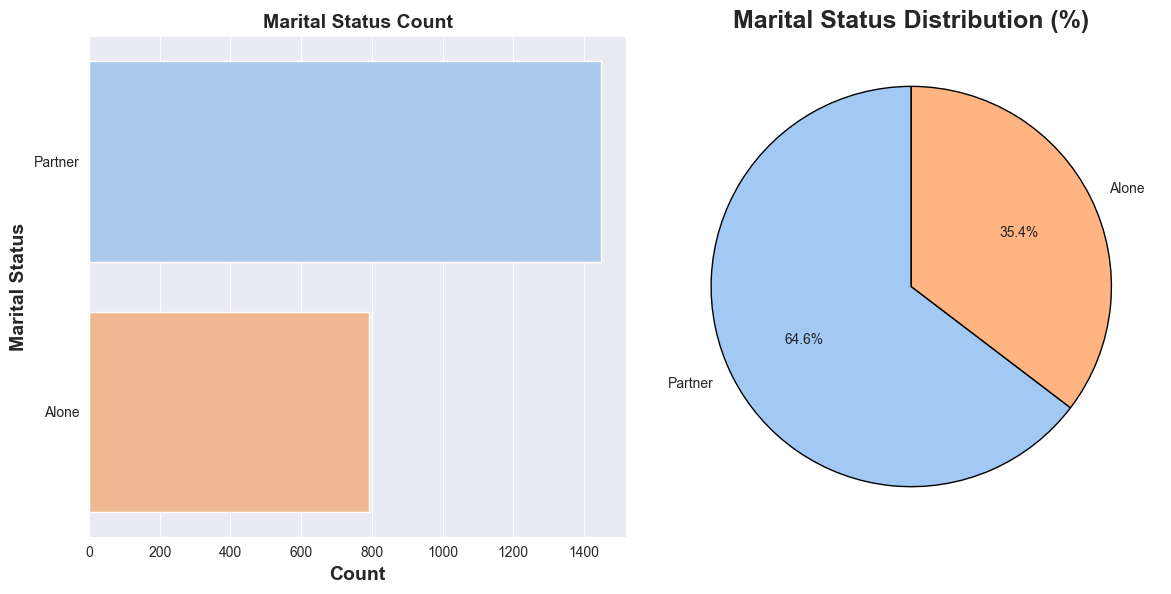

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for better visuals
sns.set_style("darkgrid")

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar Plot for Marital Status Count
sns.barplot(
    data=marital_count, 
    y='Marital_Status', 
    x='count', 
    ax=ax1, 
    palette="pastel"
)
ax1.set_title("Marital Status Count", fontsize=14 , fontweight="bold")
ax1.set_xlabel("Count", fontsize=14 , fontweight="bold")
ax1.set_ylabel("Marital Status" , fontsize=14 , fontweight="bold")

# Pie Chart for Marital Status Distribution
marital_distribution = df['Marital_Status'].value_counts(normalize=True) * 100
ax2.pie(
    marital_distribution, 
    labels=marital_distribution.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel"), 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)
ax2.set_title("Marital Status Distribution (%)",fontsize=18 , fontweight="bold")

# Display the plot
plt.tight_layout()
plt.show()


`In the pie chart, Single customers make up about 35%, while customers with a partner account for around 64%. This highlights a significant majority of partnered customers in the dataset.`

## 📌 Extracting Month and Year from `Dt_Customer`

The following code extracts the **month** and **year** from the `Dt_Customer` column, which contains customer enrollment dates. This helps in analyzing enrollment trends over time.


In [18]:
df["month_enroll"] = df["Dt_Customer"].dt.month  # Extracts the month of enrollment
df["year_enroll"] = df["Dt_Customer"].dt.year    # Extracts the year of enrollment

# Display the extracted month and year
df[["month_enroll", "year_enroll"]]

,month_enroll,year_enroll
0,9,2012
1,3,2014
2,8,2013
3,2,2014
4,1,2014
...,...,...
2235,6,2013
2236,6,2014
2237,1,2014
2238,1,2014


In [19]:
education_=df["Education"].value_counts().reset_index()
education_

,Education,count
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


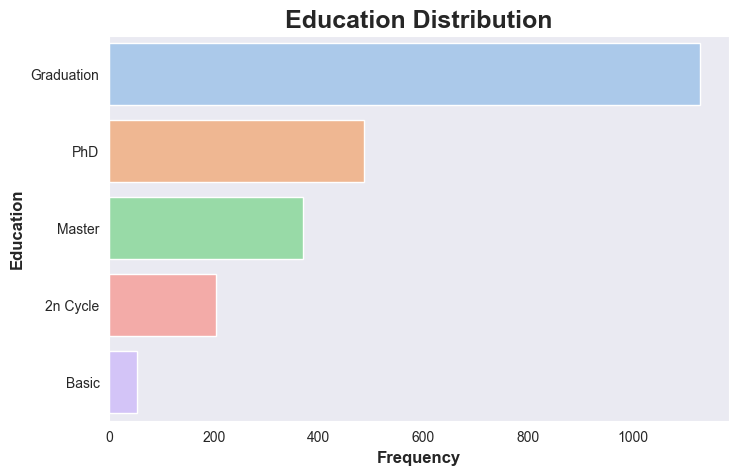

In [20]:
plt.figure(figsize=(8,5))
sns.set_style("dark")
sns.barplot(data=education_ , x="count" , y="Education" , palette="pastel")
plt.title("Education Distribution" ,fontsize=18 , fontweight="bold")
plt.xlabel("Frequency" ,fontsize=12 , fontweight="bold")
plt.ylabel("Education" , fontsize=12 , fontweight="bold")
plt.show()

## 🎓 Education Level Analysis  

- 📈 **Higher Number of Graduated Customers**: The majority of customers have completed **graduation**, making them the largest segment.  
- 📉 **Fewer School-Level Customers**: Customers with **basic education (school level)** are the least represented, indicating a smaller market segment.  

🔹 **Insight:**  
Higher education levels may indicate **better financial stability**, influencing purchasing behavior and product preferences.  


### Separating Categorical and Numerical Features


In [21]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]
numericals_features=[feature for feature in df.columns if df[feature].dtype!="O"]
print(f'Categoricals features :{categorical_features}\n')
print(f'Numericals features :{numericals_features}')

Categoricals features :['Education', 'Marital_Status']

Numericals features :['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'month_enroll', 'year_enroll']


In [22]:
df["Year_Birth"]

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

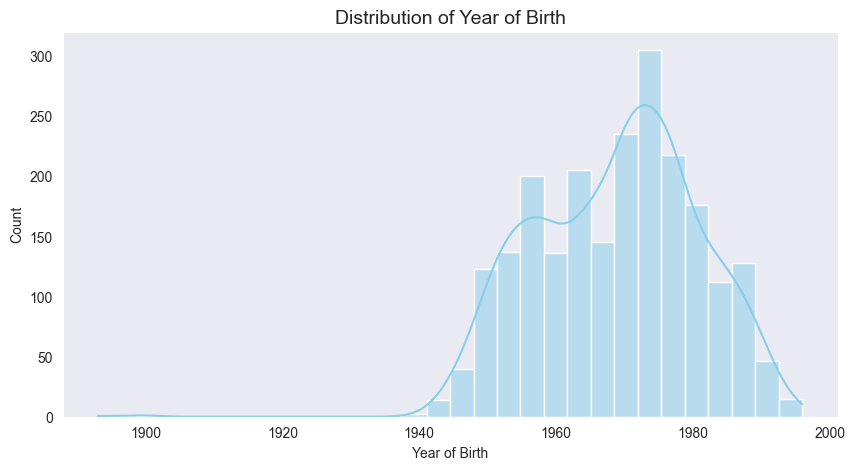

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Year_Birth"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Year of Birth", fontsize=14)
plt.xlabel("Year of Birth")
plt.ylabel("Count")
plt.show()


In [24]:
def categorize_generation(year):
    if year >= 1997:
        return "Gen Z"
    elif year >= 1981:
        return "Millennials"
    elif year >= 1965:
        return "Gen X"
    elif year >= 1946:
        return "Baby Boomers"
    else:
        return "Silent Generation"

df["Generation"]= df["Year_Birth"].apply(categorize_generation)


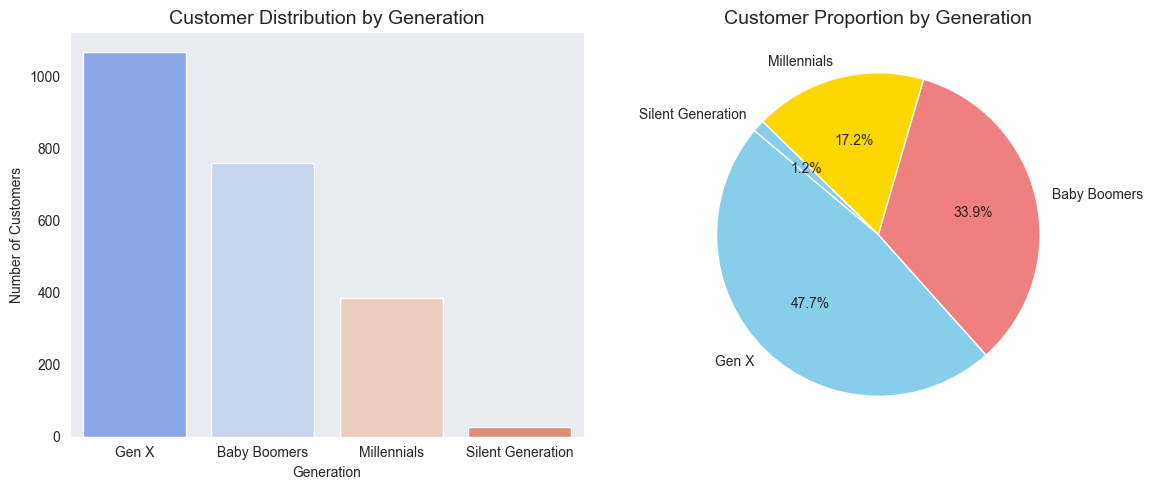

In [25]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart - Customer Count by Generation
sns.barplot(x=df["Generation"].value_counts().index, 
            y=df["Generation"].value_counts(), 
            palette="coolwarm", ax=ax1)
ax1.set_title("Customer Distribution by Generation", fontsize=14)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Number of Customers")

# Pie Chart - Proportion of Generations
df["Generation"].value_counts().plot.pie(autopct="%1.1f%%", 
                                         colors=["skyblue", "lightcoral", "gold"], 
                                         startangle=140, ax=ax2)
ax2.set_title("Customer Proportion by Generation", fontsize=14)
ax2.set_ylabel("")  # Hide y-axis label for pie chart

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## 📌 Observations on Customer Generations  

- **Gen X (1069 customers)** → Largest group, likely financially stable and brand-loyal.  
- **Baby Boomers (759 customers)** → Older customers, may have high retention but lower spending.  
- **Millennials (385 customers)** → Youngest group, tech-savvy, and more responsive to digital engagement.  

### 🔍 **Key Insights for Model Training**  
- Generational differences impact **spending, loyalty, and product preferences**.  
- **Gen X & Boomers** may have higher retention, while **Millennials** require engagement strategies.  
- Encoding this feature can improve predictions for **spending behavior, churn, and targeted marketing**. 🚀  


### Let's Calculate the Age of Customers Using the Year_Birth Column 

We will consider customers whose age is **greater than 18** and **less than 80**.  


In [26]:
today_age=2025 #current year
df["Age"]=today_age - df["Year_Birth"]  #calculating 

#removing incorrect negative age or Age Greater than 80 
df=df[(df["Age"]<80) & (df["Age"]>=18)]

In [27]:
df["Age"].unique()

array([68, 71, 60, 41, 44, 58, 54, 40, 51, 75, 42, 49, 66, 73, 38, 79, 45,
       76, 43, 46, 74, 56, 39, 36, 62, 55, 52, 50, 29, 57, 61, 48, 47, 70,
       59, 37, 77, 67, 53, 65, 34, 63, 72, 64, 69, 33, 35, 78, 32, 31, 30],
      dtype=int64)

### Observing Kids in the Family

The dataset contains two features related to children in a family:  

- **Kidhome**: Number of small children in the household.  
- **Teenhome**: Number of teenagers in the household.  


In [28]:
print(df["Kidhome"].unique())
print(df["Teenhome"].unique())

[0 1 2]
[0 1 2]



### To get the total number of kids in each family, we can sum these two columns:
- **Kidhome**: Number of small children in the household.  
- **Teenhome**: Number of teenagers in the household. 

In [29]:
df['Childrens']= df["Kidhome"] +df["Teenhome"] 
df['Childrens']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Childrens, Length: 2213, dtype: int64

### Observing Customer Purchases

In [30]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [31]:
#Calculating total product spending per customer
df["customer_spending"] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Displaying the first few rows
df[["customer_spending"]].head()

,customer_spending
0,1617
1,27
2,776
3,53
4,422


### Summing All Product Purchases by Each Customer 

In the dataset, multiple features represent the amount spent by customers on different product categories. These include:  

- **MntWines**: Amount spent on wine.  
- **MntFruits**: Amount spent on fruits.  
- **MntMeatProducts**: Amount spent on meat products.  
- **MntFishProducts**: Amount spent on fish products.  
- **MntSweetProducts**: Amount spent on sweet products.  
- **MntGoldProds**: Amount spent on gold products.  

To analyze the overall spending behavior of customers, we will sum all these features into a new column called **Customer_Spending**. This will help us understand:  

- The total amount each customer has spent on products.  
- Potential high-value customers who contribute the most to total sales.  
- Patterns in customer purchasing behavior for further analysis.

### Analyzing Customer Purchase Behavior

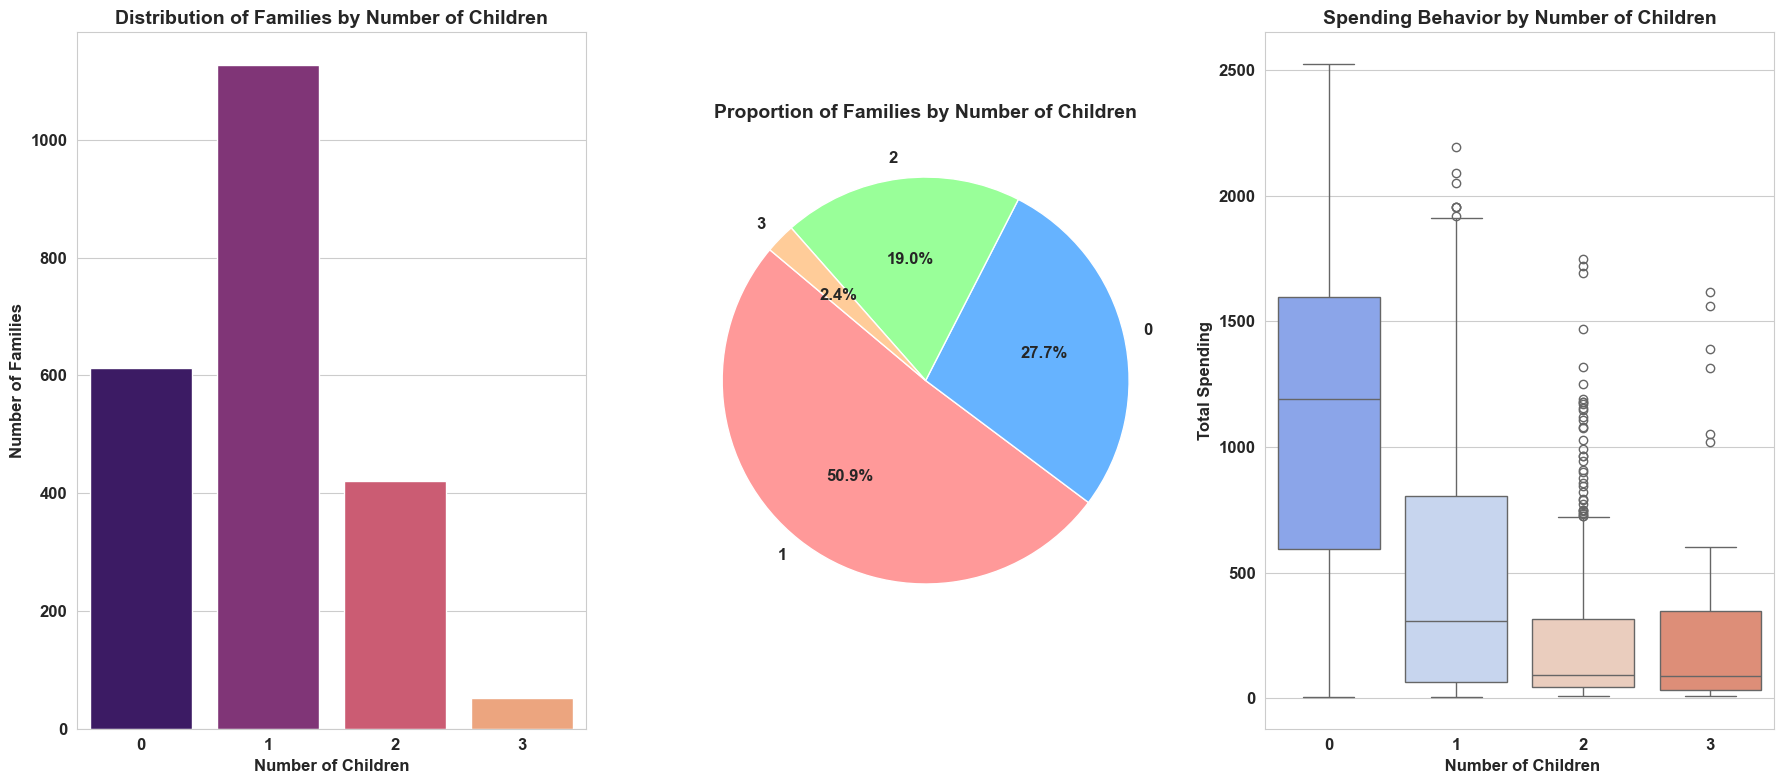

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set modern style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'font.weight': 'bold'})  # Bold fonts

# Create figure with 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# 🔹 1. Bar Chart - Family Distribution by Number of Children
sns.barplot(x=df["Childrens"].value_counts().index, 
            y=df["Childrens"].value_counts(), 
            palette="magma", ax=axes[0])
axes[0].set_title("Distribution of Families by Number of Children", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Number of Children", fontweight="bold")
axes[0].set_ylabel("Number of Families", fontweight="bold")

# 🔹 2. Pie Chart - Proportion of Families by Number of Children
colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]
df["Childrens"].value_counts().plot.pie(autopct="%1.1f%%", colors=colors, startangle=140, ax=axes[1])
axes[1].set_title("Proportion of Families by Number of Children", fontsize=14, fontweight="bold")
axes[1].set_ylabel("")  # Remove y-label for better clarity

# 🔹 3. Box Plot - Spending Behavior Based on Number of Children
sns.boxplot(x=df["Childrens"], y=df["customer_spending"], palette="coolwarm", ax=axes[2])
axes[2].set_title("Spending Behavior by Number of Children", fontsize=14, fontweight="bold")
axes[2].set_xlabel(" Number of Children", fontweight="bold")
axes[2].set_ylabel("Total Spending", fontweight="bold")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


## 🔍 **Observations on Customer Spending by Number of Children**

- **👶 50%** of customers have **1 child**,  
- **🚫 20%** have **no children**,  
- **👨‍👩‍👧 19%** have **2 children**, and  
- **👨‍👩‍👧‍👦 3%** have **3 children**.  

### 💰 **Spending Patterns**
- **High spenders** are mostly found among customers **with children**.  
- Customers **with 1 child** tend to **spend the most**, with some extreme outliers.  
- Customers **with 2 children** show **many outliers** in spending.  
- Some **3-child customers** also have **higher spending outliers**.  
- **No outliers** are observed among customers **without children**.  


### **Final Insights on Customer Spending & Children Count**

1️⃣ **High spenders** are predominantly found among **customers with children**.  
2️⃣ **Customers with 1 child** have **the highest spending** with **some extreme outliers**.  
3️⃣ **Customers with 2 children** show **significant spending variation**, with **many outliers**.  
4️⃣ **Customers with 3 children** have **a few high spenders**, but spending is **less predictable**.  
5️⃣ **Customers without children** have a **more balanced spending pattern**, with **no extreme outliers**.  
6️⃣ The presence of **outliers in families with children** suggests **varying financial priorities** and **spending habits**.  

### 🔥 **Business Takeaway**
- **Target high spenders** by offering **personalized promotions** to families with **1 or 2 children**.  
- **Understand spending variation** among families with **multiple children** to design better **marketing strategies**.  
- **No-child customers** have **steady spending**, making them ideal for **consistent engagement strategies**.  


In [33]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'month_enroll', 'year_enroll', 'Generation', 'Age', 'Childrens',
       'customer_spending'],
      dtype='object')

In [34]:
df.rename(columns={'NumDealsPurchases' : 'Deals' ,'NumWebPurchases': 'online' , 'NumCatalogPurchases' : 'Catalog'  ,'NumStorePurchases' :'Store' } , inplace=True)
df[['Deals' , 'online' ,'Catalog' , 'Store']]

,Deals,online,Catalog,Store
0,3,8,10,4
1,2,1,1,2
2,1,8,2,10
3,2,2,0,4
4,5,5,3,6
...,...,...,...,...
2235,2,9,3,4
2236,7,8,2,5
2237,1,2,3,13
2238,2,6,5,10


 To understand how customers interact with different purchasing channels, we extract the following features from the dataset:  

- **Deals**: Number of purchases made using a discount or deal.  
- **online**: Number of purchases made through the website.  
- **Catalog**: Number of purchases made via catalog orders.  
- **Store**: Number of purchases made in physical stores.  


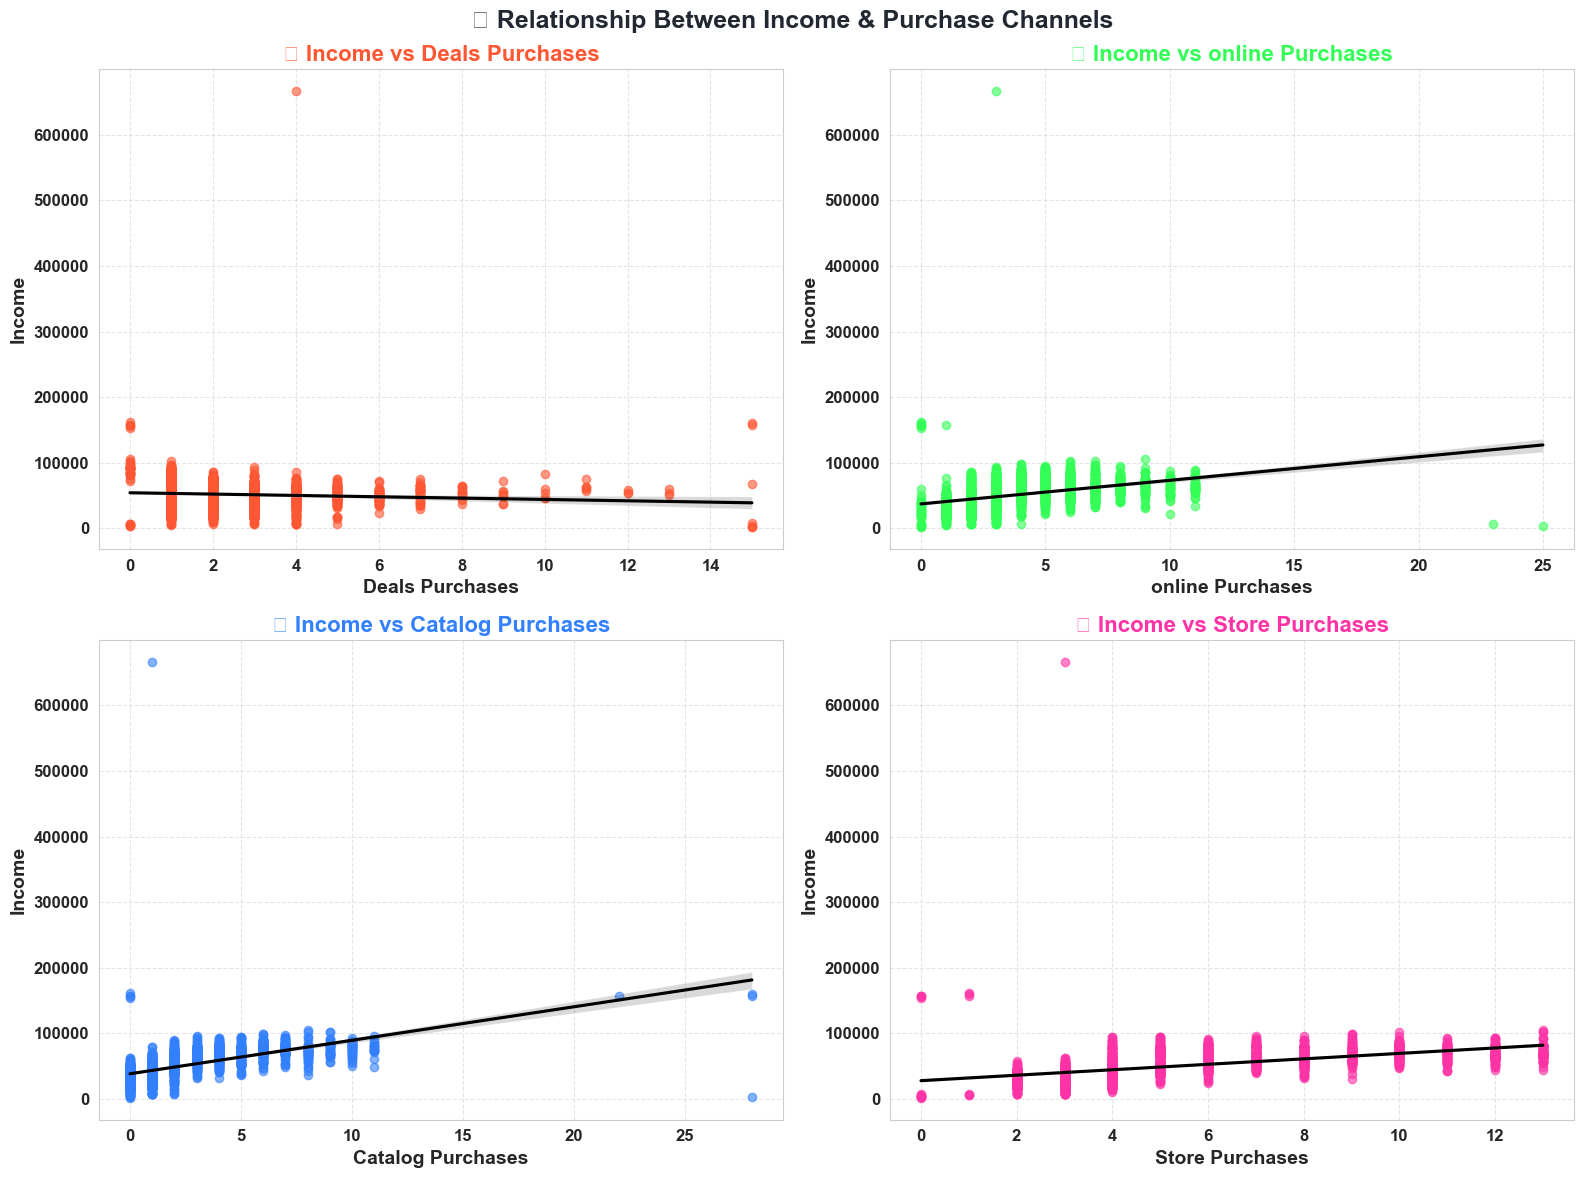

In [35]:

# Define purchase channels
purchase_channels = ['Deals', 'online', 'Catalog', 'Store']

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 layout
axes = axes.flatten()  # Flatten for easier looping

# Define a vibrant color palette for better visuals
colors = ["#FF5733", "#33FF57", "#3380FF", "#FF33A6"]

# Loop through each purchase channel and plot
for i, channel in enumerate(purchase_channels):
    # Regression plot with a smooth trendline
    sns.regplot(x=df[channel], y=df["Income"], scatter_kws={'alpha':0.6, 'color': colors[i]}, line_kws={'color': 'black'}, ax=axes[i])
    
    # Styling
    axes[i].set_title(f"💰 Income vs {channel} Purchases", fontsize=16, fontweight='bold', color=colors[i])
    axes[i].set_xlabel(f"{channel} Purchases", fontsize=14, fontweight='bold')
    axes[i].set_ylabel("Income", fontsize=14, fontweight='bold')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Adjust layout for clarity
plt.suptitle("📊 Relationship Between Income & Purchase Channels", fontsize=18, fontweight='bold', color="#222831")
plt.tight_layout()
plt.show()


### Analyzing Customer Engagement in Marketing Campaigns 

To understand how many marketing campaigns each customer has accepted, we create a new feature:  
 



In [36]:
df['Compaigns_Engagement']=df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5'] +df['AcceptedCmp1']+df['AcceptedCmp2']
df[['Compaigns_Engagement']]


,Compaigns_Engagement
0,0
1,0
2,0
3,0
4,0
...,...
2235,0
2236,1
2237,1
2238,0


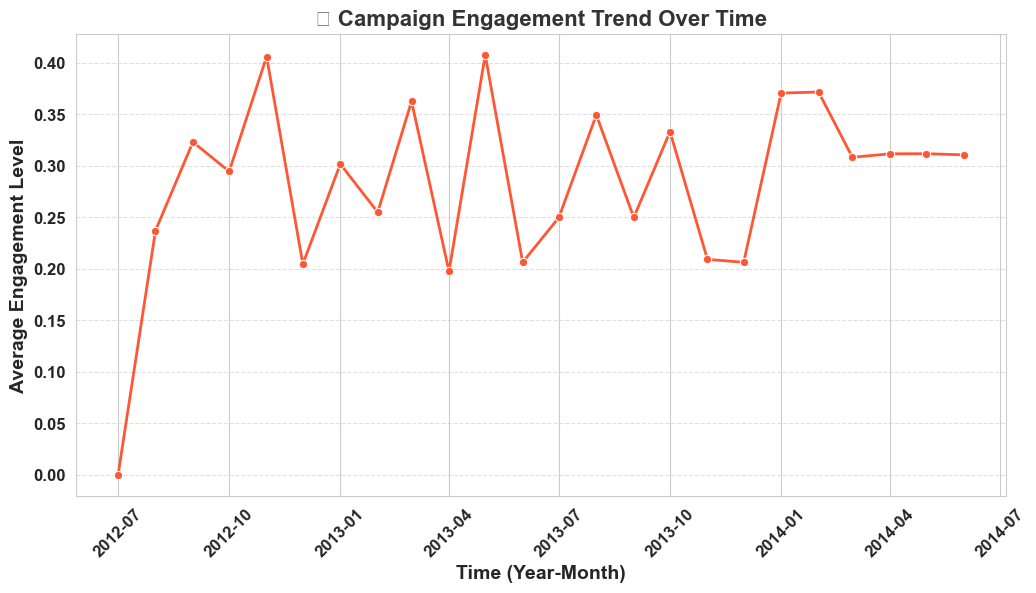

In [37]:

# Ensure 'Dt_Customer' is in datetime format (if not already)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Aggregate engagement by month & year
engagement_trend = df.groupby(df['Dt_Customer'].dt.to_period('M'))["Compaigns_Engagement"].mean()

# Convert index back to datetime for plotting
engagement_trend.index = engagement_trend.index.to_timestamp()

# Create a figure
plt.figure(figsize=(12, 6))

# Line Plot
sns.lineplot(x=engagement_trend.index, y=engagement_trend, marker='o', color="#FF5733", linewidth=2)

# Styling
plt.title("📈 Campaign Engagement Trend Over Time", fontsize=16, fontweight='bold', color="#333")
plt.xlabel("Time (Year-Month)", fontsize=14, fontweight='bold')
plt.ylabel("Average Engagement Level", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


### 📊 **Customer Enrollment Trend Analysis**  

- 📈 **Gradual Increase** – Customer enrollment **steadily increased** from mid-2012 to early 2014.  
- 🔥 **Peak Enrollment Months** – **November 2012 (40.6%)** and **May 2013 (40.7%)** saw the highest enrollment rates.  
- ❄️ **Drop in Enrollment** – Enrollment was **lower in December and April** across multiple years, indicating possible seasonal effects.  
- 📉 **Fluctuations in 2013** – Enrollment rates fluctuated but remained **relatively stable**, with **peaks in March, August, and October**.  
- 🔄 **Consistent Enrollment in 2014** – From **January to June 2014**, the enrollment rate **stabilized around 30-37%**, showing a steady trend.  

### 🔹 **Insight:**  
Understanding peak enrollment periods can help businesses **optimize marketing efforts** and **introduce targeted promotions** during high-activity months. 🚀  
